In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('data/materias_enriquecida.csv')
# df = pd.read_csv('data/Historico_de_materias.csv')

In [98]:
df['n_frases'] = df['artigo_ex'].fillna('').apply(lambda x: len(x.split('.')))
df['n_palavras'] = df['artigo_ex'].fillna('').apply(lambda x: len(x.split(' ')))

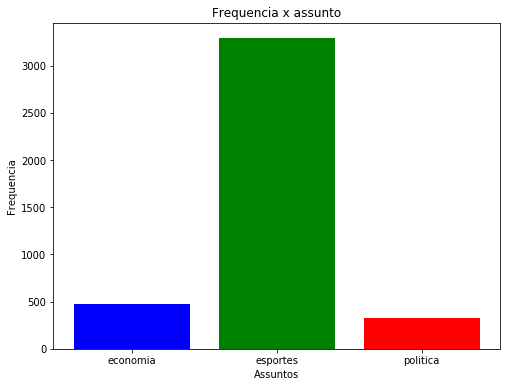

In [99]:
agrupado = df.groupby('assunto')['titulo'].count().reset_index()
plt.figure(figsize=(8, 6))  

cores = ['blue', 'green', 'red', 'yellow', 'orange']

for i, categoria in enumerate(agrupado['assunto']):
    plt.bar(categoria, agrupado['titulo'][i], color=cores[i])

plt.xlabel('Assuntos')
plt.ylabel('Frequencia')
plt.title('Frequencia x assunto')

plt.show()

In [100]:
df['safra'] = df['data'].astype(str).apply(lambda x: x[:7])
df['ano'] = df['data'].astype(str).apply(lambda x: x[:4])

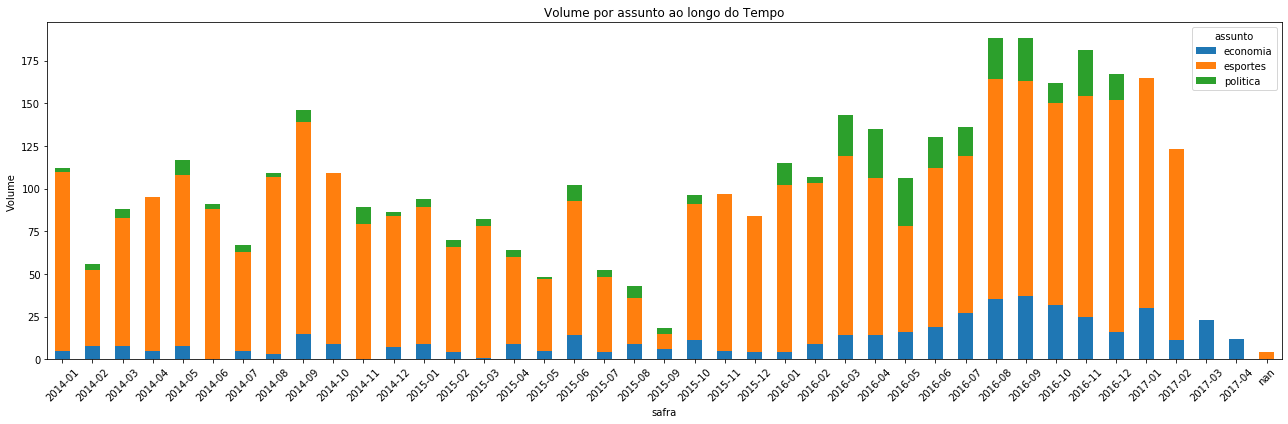

In [101]:
data = 'safra'
pd.pivot_table(df,
                index = [data],
                columns = 'assunto',
                values = 'titulo',
                aggfunc = len).plot(kind='bar', stacked=True, figsize=(18, 6))

plt.xlabel(data)
plt.ylabel('Volume')
plt.title('Volume por assunto ao longo do Tempo')
plt.xticks(rotation=45)
plt.legend(title='assunto')
plt.tight_layout()
plt.show()

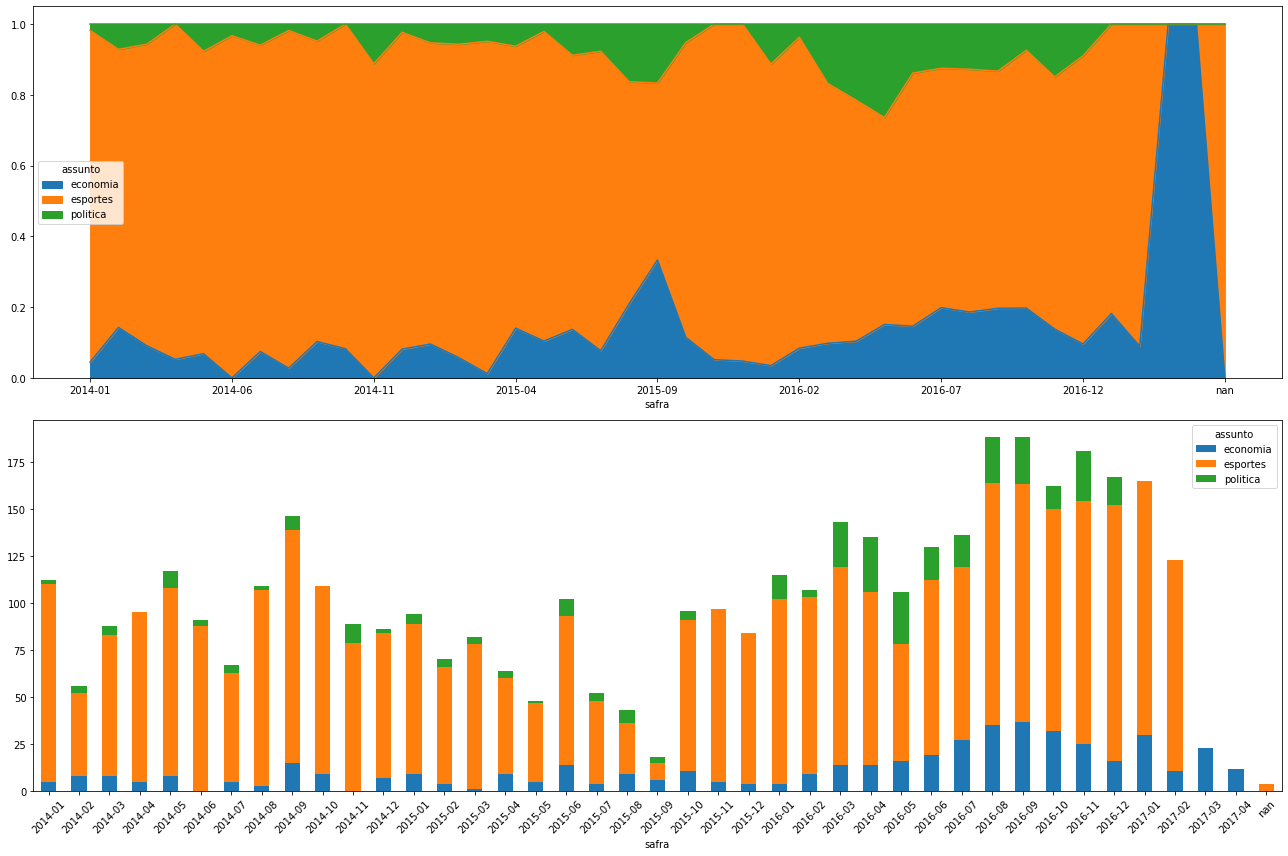

In [103]:
data = 'safra'


fig, axs = plt.subplots(2, 1, figsize=(18, 12))
p = pd.pivot_table(df,
                index = [data],
                columns = 'assunto',
                values = 'titulo',
                aggfunc = len)

cols = p.columns
                
p.plot(kind='bar', stacked=True, ax= axs[1])
total = p.sum(axis = 1)
for i in cols:
    p[i] = p[i]/total
p.plot(kind='area', stacked=True, ax= axs[0])

plt.xticks(rotation=45)

# plt.xlabel(data)
# plt.ylabel('Volume')
# plt.title('Volume por assunto ao longo do Tempo')
# plt.legend(title='assunto')
plt.tight_layout()
# plt.show()

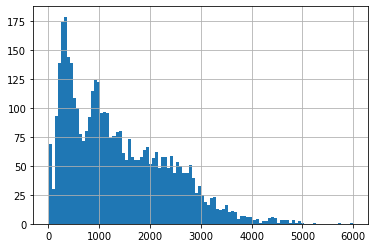

In [111]:
df['n_palavras'].hist(bins = 100)

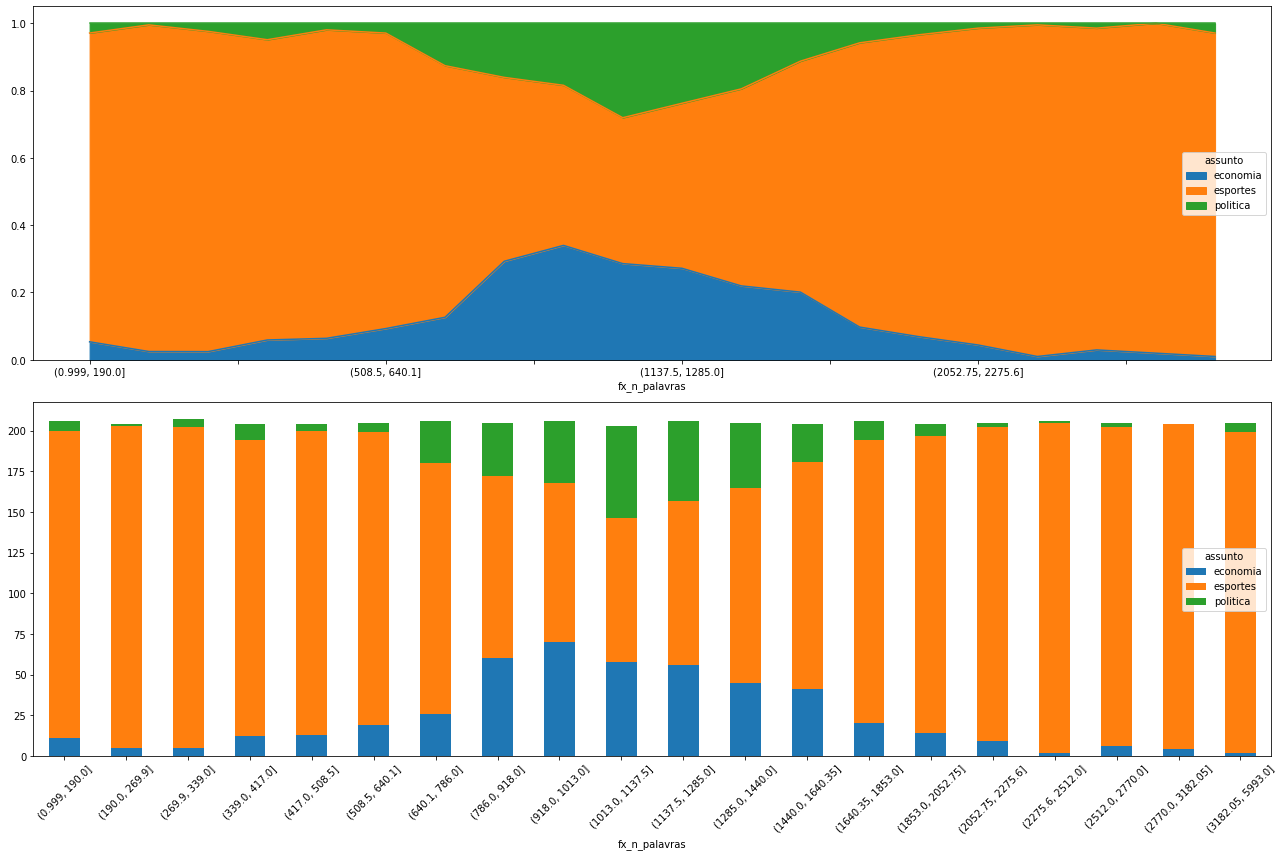

In [123]:
x = 'fx_n_palavras'

df[x] = pd.qcut(df['n_palavras'], q= 20)
y = 'assunto'


fig, axs = plt.subplots(2, 1, figsize=(18, 12))
p = pd.pivot_table(df,
                index = [x],
                columns = y,
                values = 'titulo',
                aggfunc = len)

cols = p.columns
                
p.plot(kind='bar', stacked=True, ax= axs[1])
total = p.sum(axis = 1)
for i in cols:
    p[i] = p[i]/total
p.plot(kind='area', stacked=True, ax= axs[0])

plt.xticks(rotation=45)

# plt.xlabel(data)
# plt.ylabel('Volume')
# plt.title('Volume por assunto ao longo do Tempo')
# plt.legend(title='assunto')
plt.tight_layout()
# plt.show()

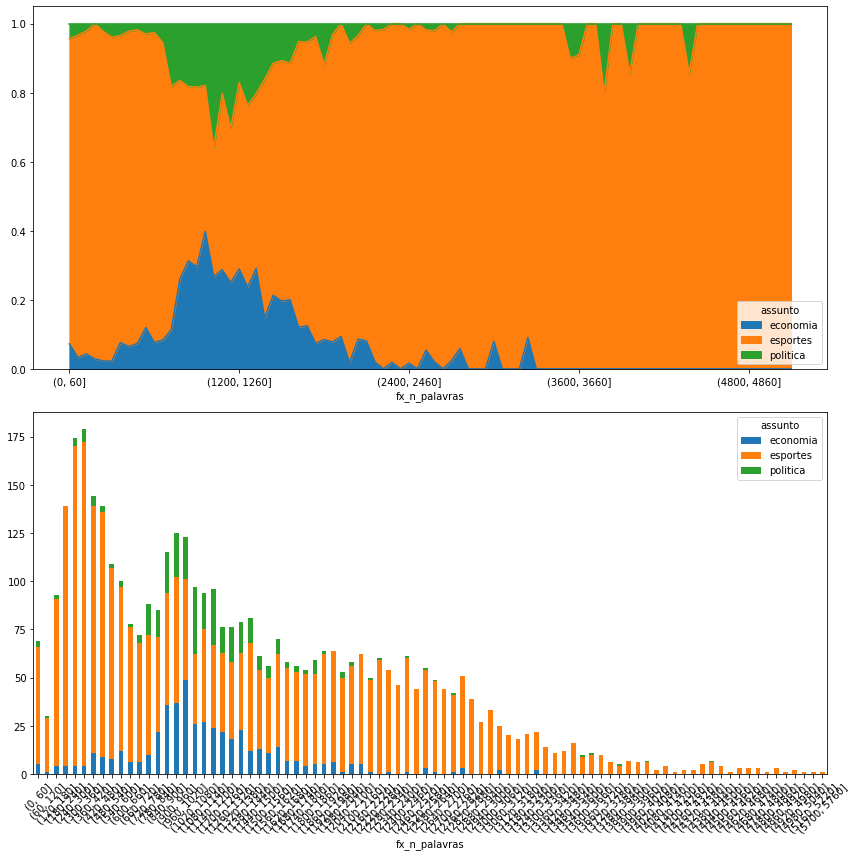

In [131]:
x = 'fx_n_palavras'

n = df['n_palavras'].max()
n_faixas = 100


bins = [i for i in range(0, n, int(np.ceil(n/n_faixas)))]

df[x] = pd.cut(df['n_palavras'], bins = bins)
y = 'assunto'


fig, axs = plt.subplots(2, 1, figsize=(12, 12))
p = pd.pivot_table(df,
                index = [x],
                columns = y,
                values = 'titulo',
                aggfunc = len)

cols = p.columns
                
p.plot(kind='bar', stacked=True, ax= axs[1])
total = p.sum(axis = 1)
for i in cols:
    p[i] = p[i]/total
p.plot(kind='area', stacked=True, ax= axs[0])

plt.xticks(rotation=45)

# plt.xlabel(data)
# plt.ylabel('Volume')
# plt.title('Volume por assunto ao longo do Tempo')
# plt.legend(title='assunto')
plt.tight_layout()
# plt.show()